In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline


In [1]:
!wget teleCust1000t.csv 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'

--2024-07-25 23:02:24--  http://telecust1000t.csv/
Resolving telecust1000t.csv (telecust1000t.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘telecust1000t.csv’
--2024-07-25 23:02:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.04s   

2024-07-25 23:02:24 (854 KB/s) - ‘teleCust1000t.csv’ saved [36047/36047]

FINISHED --2024-07-25 23:02:24--
Total wall c

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()
#como podemos ver, todos os campos estão tokenizados devidamente, não sendo necessário nenhuma modificação na df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.info()
df.describe()
#e também não há nenhum campo nulo, a df já esta devidadmente tratada.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
df['custcat'].value_counts()
#  1 - Basic Service   2 - E-Service   3 - Plus Service   4 - Total Service

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

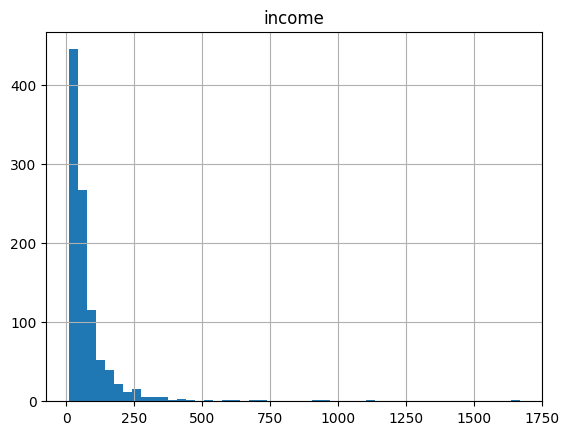

In [7]:
df.hist(column='income', bins=50)

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
x = np.asanyarray(df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']])
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [17]:
y = np.asarray(df[['custcat']])
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [57]:
from sklearn.model_selection import train_test_split

#separando aleatoriamente o set de treino e teste a partir de uma build-in func do sklearn chamada train_test_split (também utilizei no Housing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4) #a depender do numero de random_state, a acurácia também pode aumentar ou diminuir.
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
k = 7

neighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neighbors

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [66]:
y_=neighbors.predict(x_test)
y_[0:5]

array([4, 4, 1, 4, 4])

In [67]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_))

Train set Accuracy:  0.49375
Test set Accuracy:  0.345


In [68]:
#Algoritmo de iteração para acharmos o melhor número para K

k_iter = 10
mean_acc = np.zeros((k_iter-1))
std_acc = np.zeros((k_iter-1))

for n in range(1,k_iter):
    neighbors = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_ = neighbors.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_)

    std_acc[n-1] = np.std(y_==y_test)/np.sqrt(y_.shape[0])

mean_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.325, 0.32 ])

<function matplotlib.pyplot.show(close=None, block=None)>

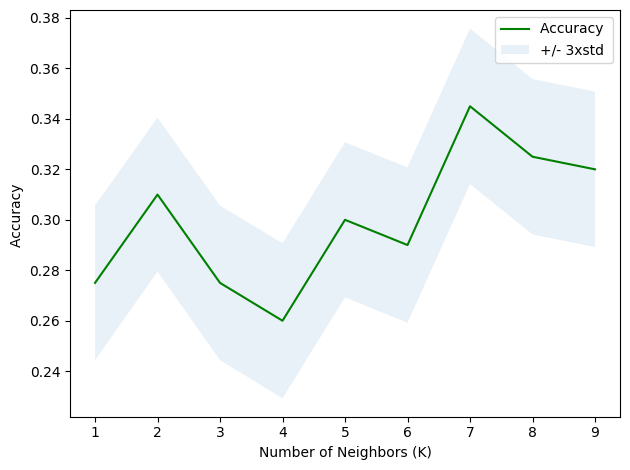

In [69]:
plt.plot(range(1,k_iter),mean_acc,'g')
plt.fill_between(range(1,k_iter),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show

#K=7 é o melhor numero para K neste random_state. (como descobri qual o melhor random state?)